In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("globaltech_machinery_logs_P1.csv")


In [2]:
df.head()
df.shape
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Machine_ID           50000 non-null  str    
 1   Sensor_Read_Date     50000 non-null  str    
 2   Machine_Model        50000 non-null  str    
 3   Avg_Temperature      50000 non-null  float64
 4   Vibration_Level      50000 non-null  float64
 5   Rotating_Speed       50000 non-null  int64  
 6   Voltage_Fluctuation  50000 non-null  float64
 7   Torque_Nm            50000 non-null  float64
 8   Oil_Viscosity        50000 non-null  float64
 9   Ambient_Humidity     50000 non-null  float64
 10  Operator_Experience  50000 non-null  str    
 11  Last_Service_Days    50000 non-null  int64  
 12  Fault_Code           7363 non-null   str    
 13  Working_Hours_Total  50000 non-null  int64  
 14  Failure_Status       50000 non-null  int64  
dtypes: float64(6), int64(4), str(5)
memory usage: 5

In [3]:
df.isnull().sum()


Machine_ID                 0
Sensor_Read_Date           0
Machine_Model              0
Avg_Temperature            0
Vibration_Level            0
Rotating_Speed             0
Voltage_Fluctuation        0
Torque_Nm                  0
Oil_Viscosity              0
Ambient_Humidity           0
Operator_Experience        0
Last_Service_Days          0
Fault_Code             42637
Working_Hours_Total        0
Failure_Status             0
dtype: int64

In [4]:
df['Fault_Code'] = df['Fault_Code'].fillna("No_Fault")


In [5]:
df.isnull().sum()


Machine_ID             0
Sensor_Read_Date       0
Machine_Model          0
Avg_Temperature        0
Vibration_Level        0
Rotating_Speed         0
Voltage_Fluctuation    0
Torque_Nm              0
Oil_Viscosity          0
Ambient_Humidity       0
Operator_Experience    0
Last_Service_Days      0
Fault_Code             0
Working_Hours_Total    0
Failure_Status         0
dtype: int64

In [6]:
df.duplicated().sum()


np.int64(0)

In [7]:
df = df.drop_duplicates()


In [8]:
df['Sensor_Read_Date'] = pd.to_datetime(df['Sensor_Read_Date'])


In [9]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Machine_ID           50000 non-null  str           
 1   Sensor_Read_Date     50000 non-null  datetime64[us]
 2   Machine_Model        50000 non-null  str           
 3   Avg_Temperature      50000 non-null  float64       
 4   Vibration_Level      50000 non-null  float64       
 5   Rotating_Speed       50000 non-null  int64         
 6   Voltage_Fluctuation  50000 non-null  float64       
 7   Torque_Nm            50000 non-null  float64       
 8   Oil_Viscosity        50000 non-null  float64       
 9   Ambient_Humidity     50000 non-null  float64       
 10  Operator_Experience  50000 non-null  str           
 11  Last_Service_Days    50000 non-null  int64         
 12  Fault_Code           50000 non-null  str           
 13  Working_Hours_Total  50000 non-null  int64

In [10]:
df.describe()


,Sensor_Read_Date,Avg_Temperature,Vibration_Level,Rotating_Speed,Voltage_Fluctuation,Torque_Nm,Oil_Viscosity,Ambient_Humidity,Last_Service_Days,Working_Hours_Total,Failure_Status
count,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,2024-07-01 15:37:12.144000,70.005461,5.020966,2000.247520,219.990251,39.979987,35.056479,54.998841,89.86978,5238.673320,0.202280
min,2024-01-01 00:00:00,32.112992,0.000109,1108.000000,179.407951,-0.372477,10.000167,20.001899,1.00000,500.000000,0.000000
25%,2024-03-31 14:00:00,63.193076,2.514399,1866.000000,213.257478,33.271808,22.505944,37.594181,45.00000,2863.000000,0.000000
50%,2024-07-01 15:00:00,69.969828,5.024924,2001.000000,219.985516,39.978395,35.088849,54.925180,90.00000,5232.000000,0.000000
75%,2024-10-01 14:00:00,76.762175,7.530642,2135.000000,226.704540,46.685418,47.578366,72.417495,135.00000,7610.000000,0.000000
max,2025-01-01 00:00:00,113.565845,9.999842,2960.000000,263.618301,81.353194,59.998932,89.999382,179.00000,9999.000000,1.000000
std,NaN,10.035714,2.890948,199.719487,9.998622,9.967994,14.433879,20.157461,51.79877,2739.493673,0.401704


In [11]:
df['Failure_Status'].value_counts()
df['Failure_Status'].value_counts(normalize=True)


Failure_Status
0    0.79772
1    0.20228
Name: proportion, dtype: float64

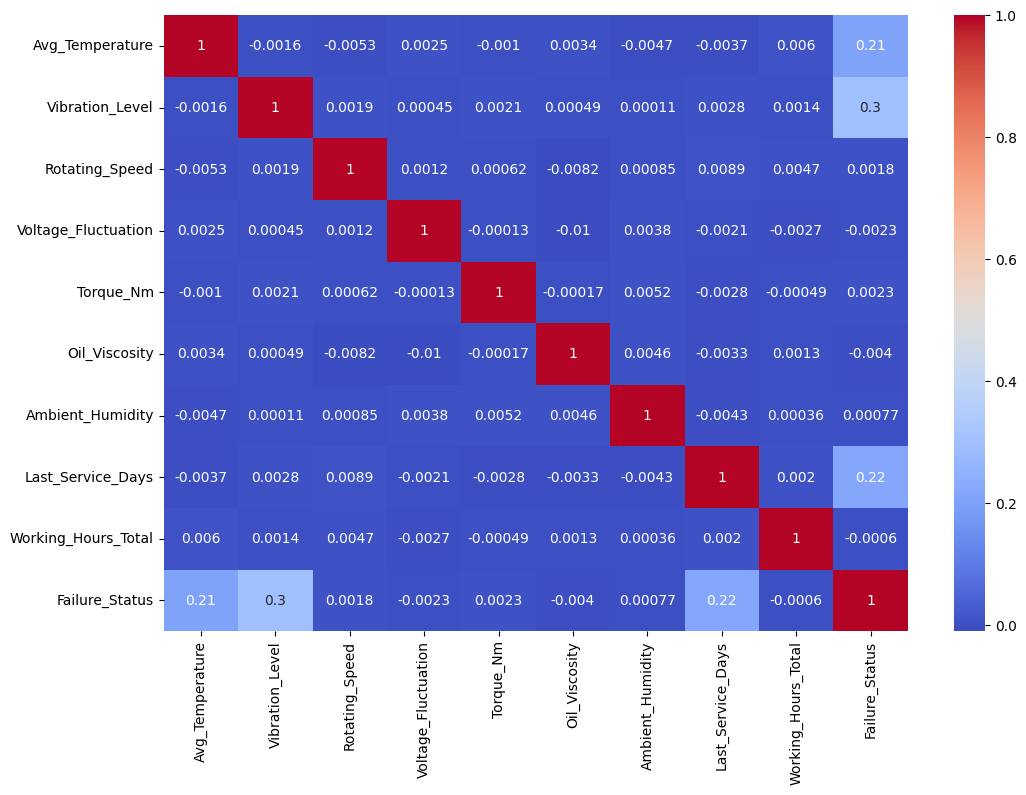

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),
            annot=True,
            cmap='coolwarm')
plt.show()


In [13]:
df['Year'] = df['Sensor_Read_Date'].dt.year
df['Month'] = df['Sensor_Read_Date'].dt.month
df['Day'] = df['Sensor_Read_Date'].dt.day
df['Weekday'] = df['Sensor_Read_Date'].dt.weekday


In [14]:
df.drop('Sensor_Read_Date', axis=1, inplace=True)


In [15]:
df['Stress_Index'] = df['Torque_Nm'] * df['Vibration_Level']
df['Model_Avg_Temp'] = df.groupby('Machine_Model')['Avg_Temperature'].transform('mean')
df['Temp_Deviation'] = df['Avg_Temperature'] - df['Model_Avg_Temp']


In [16]:
df['Service_Risk'] = pd.cut(
    df['Last_Service_Days'],
    bins=[0, 30, 90, 150, 200],
    labels=['Low', 'Medium', 'High', 'Critical']
)


In [17]:
Q1 = df['Avg_Temperature'].quantile(0.25)
Q3 = df['Avg_Temperature'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Avg_Temperature'] < lower) | (df['Avg_Temperature'] > upper)]
len(outliers)


326

In [18]:
df['Avg_Temperature'] = df['Avg_Temperature'].clip(lower, upper)


In [19]:
def cap_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)

cap_outliers('Vibration_Level')
cap_outliers('Torque_Nm')
cap_outliers('Voltage_Fluctuation')


In [20]:
df.select_dtypes(include=np.number).corr()['Failure_Status'].sort_values(ascending=False)


Failure_Status         1.000000
Vibration_Level        0.299311
Stress_Index           0.268942
Last_Service_Days      0.217502
Temp_Deviation         0.206296
Avg_Temperature        0.206094
Torque_Nm              0.002407
Model_Avg_Temp         0.002200
Rotating_Speed         0.001751
Ambient_Humidity       0.000772
Working_Hours_Total   -0.000600
Day                   -0.000919
Year                  -0.000971
Voltage_Fluctuation   -0.002403
Month                 -0.003324
Oil_Viscosity         -0.004029
Weekday               -0.005332
Name: Failure_Status, dtype: float64

In [21]:
X = df.drop(['Failure_Status', 'Machine_ID'], axis=1)
y = df['Failure_Status']


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [23]:
categorical_cols = [
    'Machine_Model',
    'Operator_Experience',
    'Fault_Code',
    'Service_Risk'
]


In [24]:
numeric_cols = [col for col in X.columns if col not in categorical_cols]


In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[7605  372]
 [1416  607]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7977
           1       0.62      0.30      0.40      2023

    accuracy                           0.82     10000
   macro avg       0.73      0.63      0.65     10000
weighted avg       0.80      0.82      0.80     10000


ROC-AUC: 0.8109725495401355


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [29]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Confusion Matrix:
 [[7607  370]
 [1482  541]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7977
           1       0.59      0.27      0.37      2023

    accuracy                           0.81     10000
   macro avg       0.72      0.61      0.63     10000
weighted avg       0.79      0.81      0.79     10000


ROC-AUC: 0.794263518738469


In [30]:
log_balanced = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
    ))
])

log_balanced.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [31]:
y_pred_bal = log_balanced.predict(X_test)
y_prob_bal = log_balanced.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bal))
print("\nROC-AUC:", roc_auc_score(y_test, y_prob_bal))


Confusion Matrix:
 [[5758 2219]
 [ 519 1504]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81      7977
           1       0.40      0.74      0.52      2023

    accuracy                           0.73     10000
   macro avg       0.66      0.73      0.67     10000
weighted avg       0.81      0.73      0.75     10000


ROC-AUC: 0.8108691256517208


In [32]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    log_balanced,
    X,
    y,
    cv=skf,
    scoring='roc_auc'
)

print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())


Cross-Validation ROC-AUC Scores: [0.81347953 0.81701488 0.81623316 0.802715   0.81266575]
Mean ROC-AUC: 0.8124216647153852


In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2']
}

grid = GridSearchCV(
    log_balanced,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'model__C': 0.1, 'model__penalty': 'l2'}
Best CV Score: 0.8126439019732317


C:\Users\Ann Maria\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [34]:
best_model = grid.best_estimator_

y_pred_tuned = best_model.predict(X_test)
y_prob_tuned = best_model.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))
print("\nROC-AUC:", roc_auc_score(y_test, y_prob_tuned))


Confusion Matrix:
 [[5752 2225]
 [ 518 1505]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81      7977
           1       0.40      0.74      0.52      2023

    accuracy                           0.73     10000
   macro avg       0.66      0.73      0.67     10000
weighted avg       0.81      0.73      0.75     10000


ROC-AUC: 0.8108466314207473


In [35]:
from xgboost import XGBClassifier

scale_weight = (len(y_train) - sum(y_train)) / sum(y_train)

xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        scale_pos_weight=scale_weight,
        random_state=42,
        eval_metric='logloss'
    ))
])

xgb_model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [36]:
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


Confusion Matrix:
 [[5865 2112]
 [ 571 1452]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.81      7977
           1       0.41      0.72      0.52      2023

    accuracy                           0.73     10000
   macro avg       0.66      0.73      0.67     10000
weighted avg       0.81      0.73      0.75     10000


ROC-AUC: 0.8003288123647133


In [37]:
#pip install shap


In [38]:
import shap


In [39]:
# Get processed training data
X_train_processed = best_model.named_steps['preprocessor'].transform(X_train)


In [40]:
# Get encoded categorical feature names
ohe = best_model.named_steps['preprocessor'].named_transformers_['cat']
encoded_features = ohe.get_feature_names_out(categorical_cols)

# Combine numeric + encoded features
all_features = numeric_cols + list(encoded_features)


In [41]:
explainer = shap.LinearExplainer(
    best_model.named_steps['model'],
    X_train_processed
)

shap_values = explainer.shap_values(X_train_processed)


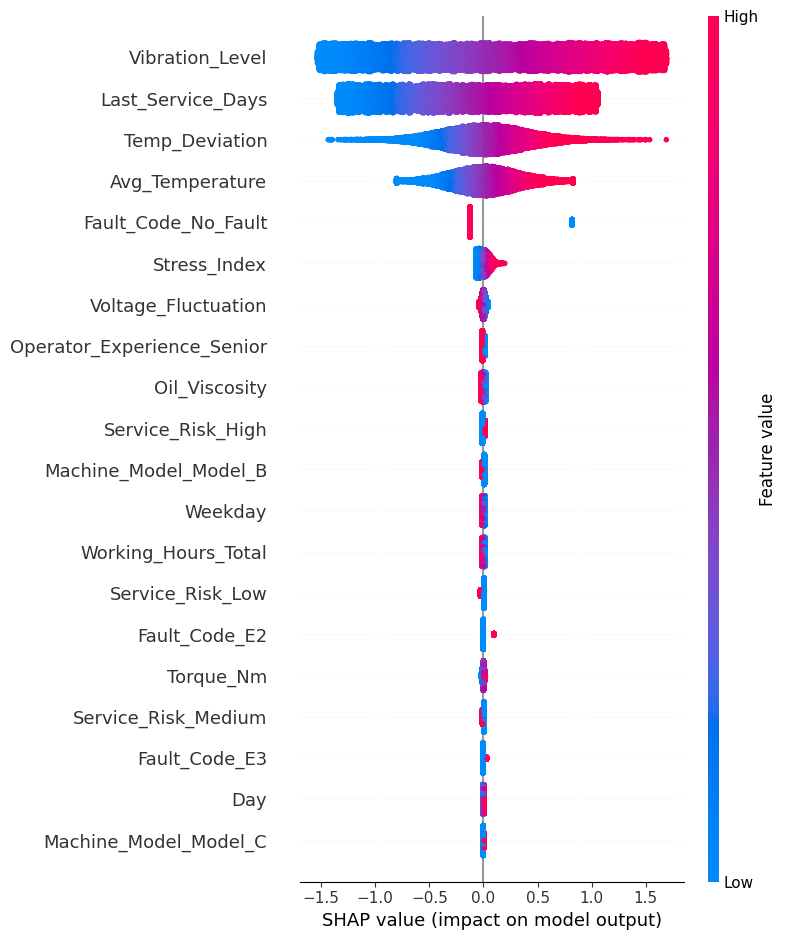

In [42]:
shap.summary_plot(
    shap_values,
    X_train_processed,
    feature_names=all_features
)


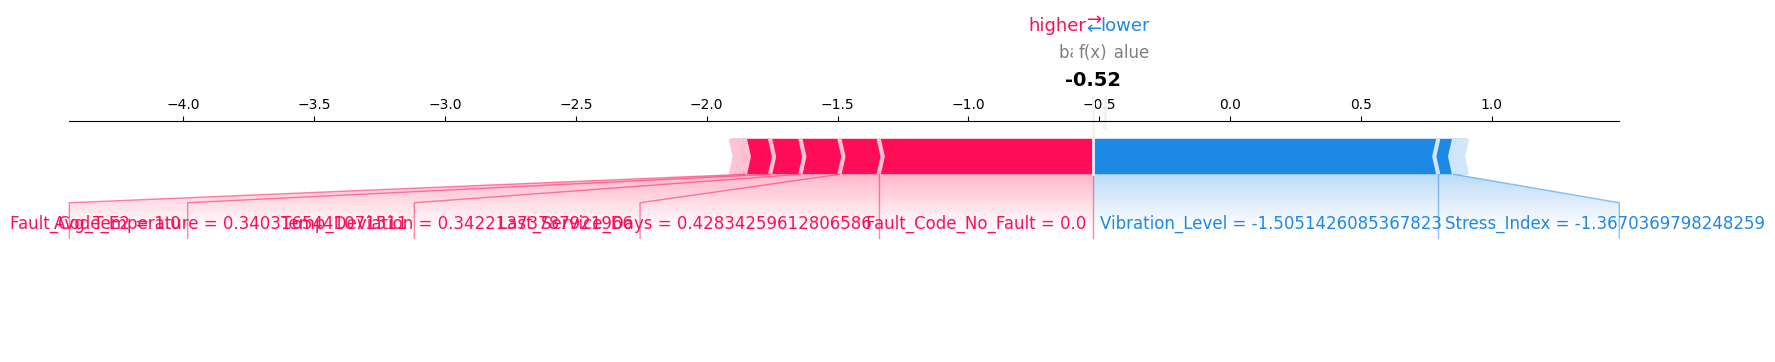

In [43]:
# Choose one failed example
failed_index = y_train[y_train == 1].index[0]

X_single = X_train.loc[failed_index:failed_index]
X_single_processed = best_model.named_steps['preprocessor'].transform(X_single)

shap_values_single = explainer.shap_values(X_single_processed)

shap.force_plot(
    explainer.expected_value,
    shap_values_single,
    X_single_processed,
    feature_names=all_features,
    matplotlib=True
)


In [44]:
import joblib

joblib.dump(best_model, "predictive_maintenance_model.pkl")


['predictive_maintenance_model.pkl']